# Common engineering numeric problems
This notebook aims to collect a very brief summary of simple ways to solve common engineering problems in Python

For a far more comprehensive discussion of chemical engineering problems solved in Python, see the [Kitchin Group pycse file](http://kitchingroup.cheme.cmu.edu/pycse/pycse.html).

# Table lookup/interpolation

## 1d: numpy.interp

Problem: find P where T=130.

<table>
<tr><th>T</th><th>P</th></tr>
<tr><td>100</td><td>200</td></tr>
<tr><td>200</td><td>500</td></tr>
<tr><td>300</td><td>1000</td></tr>
</table>

In [138]:
import numpy

T = [100, 200, 300]
P = [200, 500, 1000]

numpy.interp(150, T, P)

## 2d: scipy.interpolate.interp2d

Problem: Find the viscosity from this table for $T=230$ and $P=800$

<table>
<tr><th>T\P</th><td>200</td><td>500</td><td>1000</td></tr>
<tr><td>100</td><td>5</td><td>4</td><td>2</td></tr>
<tr><td>200</td><td>3</td><td>3</td><td>2</td></tr>
<tr><td>300</td><td>2</td><td>2</td><td>1</td></tr>
</table>

In [139]:
import scipy.interpolate

T = [100, 200, 300]
P = [200, 500, 1000]

visc = [[5, 4, 2],
        [3, 3, 2],
        [2, 2, 1]]

In [140]:
interpolator = scipy.interpolate.interp2d(T, P, visc)
interpolator(230, 800)

array([ 2.1])

# Plotting

Plotting is normally handled by the matplotlib library. The pyplot interface aims for rough Matlab equivalence

In [141]:
import matplotlib.pyplot as plt

The notebook allows for inline graphics

In [142]:
%matplotlib inline

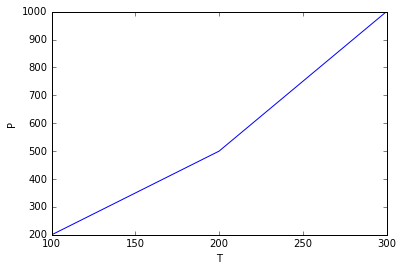

In [143]:
plt.plot(T, P)
plt.xlabel('T')
plt.ylabel('P')

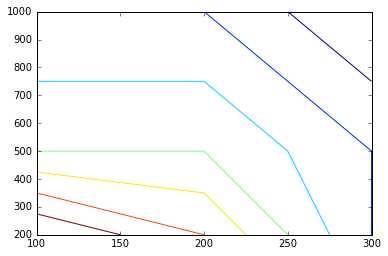

In [144]:
plt.contour(T, P, visc)

# Algebra (manipulation of equations)

The sympy library supplies the ability to manipulate equations.

In [145]:
import sympy
sympy.init_printing()  # This will make the expressions be printed in a more pretty way

In [146]:
x = sympy.Symbol('x')

In [147]:
equation = sympy.expand((x + 1)**4)
equation

In [148]:
y = sympy.Symbol('y')

In [149]:
equation.subs(x, y + 1)

# Systems of linear equations
Systems of linear equations can be solved directly without iteration. In both cases we reason via matrix algebra.

$$\begin{align}
2a + 3b + 4c &= 5 \\
2b + c &= 1 \\
a + b + c &= 1 \\
\end{align}$$

## Analytic solution
### sympy.solve

In [150]:
a, b, c = sympy.symbols('a, b, c')

We state the equations in the form $f(a, b, c) = 0$.

In [151]:
sympy.solve([2*a + 3*b + 4*c - 5,
             2*b - c - 1,
             a + b + c - 1], [a, b, c])

### scipy.linalg.solve

In [152]:
A = numpy.matrix([[2, 3, 4],
                  [0, 2, -1],
                  [1, 1, 1]])
c = numpy.matrix([5, 1, 1]).T  # .T for transpose

Direct calculation via inverse:

In [153]:
A.I*c

matrix([[-1.],
        [ 1.],
        [ 1.]])

For larger matrices, it can be faster to use a dedicated solver:

In [154]:
scipy.linalg.solve(A, c)

array([[-1.],
       [ 1.],
       [ 1.]])

# Laplace transforms
## sympy.laplace_transform

In [155]:
t, s = sympy.symbols('t, s')

In [156]:
sympy.laplace_transform(sympy.sin(t), t, s)

(1/(s**2 + 1), 0, True)

## sympy.inverse_laplace_transform

In [157]:
sympy.inverse_laplace_transform(1/(s + 1), s, t)

# Systems of nonlinear equations
## Analytic solution (sometimes):
### sympy.solve

In [158]:
sympy.solve([a**2 + b,
             a/b + 1], [a, b])

## Numeric solution (often)
### scipy.optimize.fsolve

In [159]:
import scipy.optimize

In [160]:
def eqs(x):
    a, b = x
    return [a**2 + b,
            a/b + 1]

In [161]:
scipy.optimize.fsolve(eqs, [2, -1])

array([ 1., -1.])

# Systems of ODEs (IVP)
## scipy.integrate.odeint

In [162]:
def sys(x, t):
    a, b = x
    return [-2*a, -a - 2*b]

In [163]:
times = numpy.linspace(0, 5)

In [164]:
scipy.integrate.odeint?

In [165]:
solution = scipy.integrate.odeint(sys, [1, 1], times)

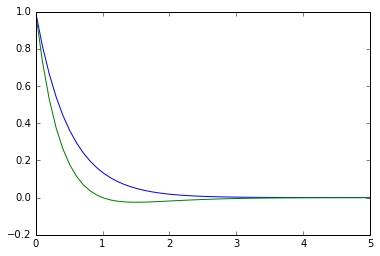

In [166]:
plt.plot(times, solution)

# Numerical integration (aka quadrature)
## Given a function
### scipy.integrate.quad

Let's say we're trying to integrate the surface under the curve $f(x) = \sin(x)/x$ between 0.5 and 1

In [167]:
def f(x):
    return numpy.sin(x)/x

In [168]:
x = numpy.linspace(0.01, 10)

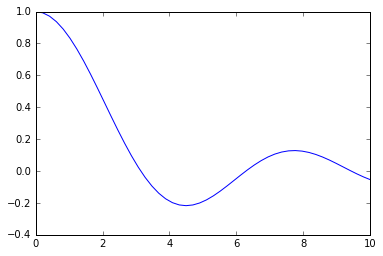

In [169]:
plt.plot(x, f(x))

In [170]:
integral, error = scipy.integrate.quad(f, 0.5, 1)
print(integral)

0.45297565232411635


## Given smooth data
### Trapezoidal rule: scipy.signal.trapz

In [171]:
xdata = numpy.linspace(0.5, 1)
ydata = f(xdata)

In [172]:
scipy.integrate.trapz(ydata, xdata)  # note it's _not_ x, y

### Simpson's rule: scipy.signal.simps

In [173]:
scipy.integrate.simps(ydata, xdata)

# Numerical derivatives
## Given smooth data
### central difference estimate: numpy.gradient

In [174]:
x = numpy.linspace(0, 2*numpy.pi)

In [175]:
y = numpy.sin(x)

In [176]:
derivative_estimate = numpy.gradient(y, x[1])

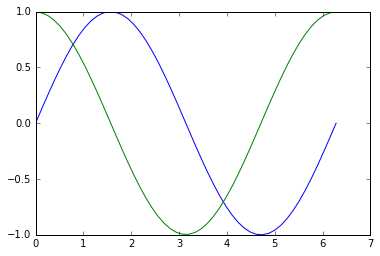

In [177]:
plt.plot(x, y, x, derivative_estimate)

## Given noisy data
### Savitzky-Golay scipy.signal.savgol_filter

That's fine for smooth data, but what if you have some noise added?

In [178]:
y_noise = y + numpy.random.randn(len(y))*0.1

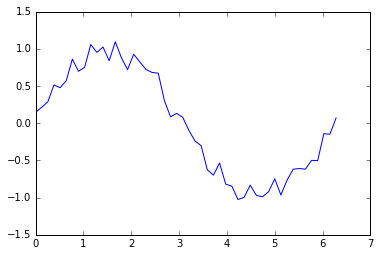

In [179]:
plt.plot(x, y_noise)

In [180]:
derivative_estimate = numpy.gradient(y_noise, x[1])

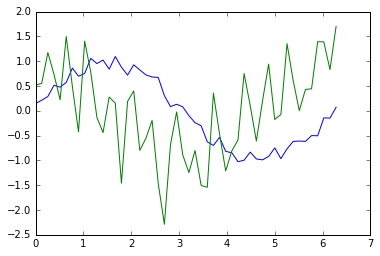

In [181]:
plt.plot(x, y_noise, x, derivative_estimate)

That's clearly not great.

In [182]:
import scipy.signal

In [183]:
smooth_derivative_estimate = scipy.signal.savgol_filter(y, 5, 2, deriv=1, delta=x[1])

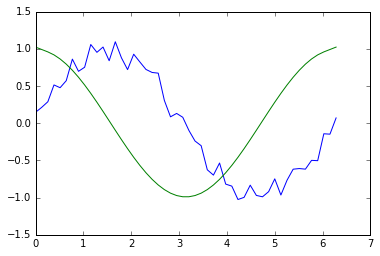

In [184]:
plt.plot(x, y_noise, x, smooth_derivative_estimate)

That's more like it!

# Optimisation
## Nonlinear
### scipy.optimize.minimize

Let's minimise $\sin(x)/x$ 

/Users/alchemyst/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


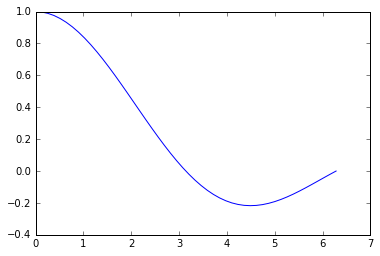

In [186]:
plt.plot(x, f(x))

By inspection, we can see the minimum lies between 4 and 5.

In [187]:
scipy.optimize.minimize(f, 4.5)

      fun: -0.21723362821071318
 hess_inv: array([[ 4.61057157]])
      jac: array([ -4.67523932e-07])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([ 4.49340729])

# Statistical analysis
## Regression

Simple polynomial regression

In [218]:
x = numpy.linspace(1, 4, 20)

In [219]:
y = f(x)

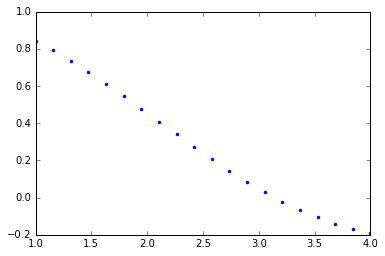

In [220]:
plt.plot(x, y, '.')

In [223]:
quadratic = numpy.polyfit(x, y, 2)

In [225]:
smoothx = numpy.linspace(1, 4, 1000)

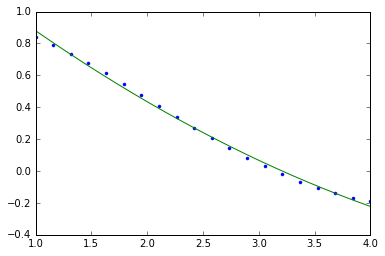

In [226]:
plt.plot(x, y, '.')
plt.plot(smoothx, numpy.polyval(quadratic, smoothx))